#### Use both statsmodels.formula.api and statsmodels.api to build the model
#### For statsmodels.formula.api, it is convenient when building the model with data and formula (and is particularly more convenient for data of DataFrame types). For array shaped data for the predictors/response, statsmodels.api is more convenient.
#### Please note that smf (statsmodels.formula.api) model includes intercept as default, while sm (statsmodels.api) requires an explicit constant term to be added to include intercepts

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from collections import Counter
sns.set_style(style="darkgrid")

In [2]:
galton = pd.read_csv('../data/galton.csv').drop('Unnamed: 0', axis=1)

In [3]:
x = galton[galton['variable'] == 'parent']['value'].values
y = galton[galton['variable'] == 'child']['value'].values

In [4]:
beta1 = np.corrcoef(y, x)[0][1] * y.std() / x.std()
beta0 = y.mean() - beta1 * x.mean()
beta0, beta1

(23.94153018041274, 0.6462905819936424)

### Use statsmodels.api

In [5]:
model_1 = sm.OLS(y,sm.add_constant(x)).fit()
model_1.params

array([23.94153018,  0.64629058])

### Use statsmodel.formula.api

In [6]:
df = {
    'y': y,
    'x': x
}
df = pd.DataFrame(df)

In [7]:
df.head(2)

,y,x
0,61.7,70.5
1,61.7,68.5


In [8]:
model_2 = smf.ols('y ~ x', data=df).fit()
model_2.params

Intercept    23.941530
x             0.646291
dtype: float64

## Regression through the origin 

In [9]:
yc = y - y.mean()
xc = x - x.mean()

In [10]:
beta1 = sum(yc * xc) / sum(xc ** 2)

In [11]:
beta1, model_2.params[1]

(0.6462905819936439, 0.6462905819936415)

In [12]:
model_3 = smf.OLS(yc, xc).fit()
model_3.params[0]

0.6462905819936394

In [13]:
df = {
    'yc': yc,
    'xc': xc
}
df = pd.DataFrame(df)

model_4 = smf.ols('yc ~ xc - 1',data=df).fit()
model_4.params

xc    0.646291
dtype: float64

## Normalizing variables 

In [14]:
yn = (y - y.mean())/ y.std()
xn = (x - x.mean()) / x.std()

In [15]:
model_5 = sm.OLS(yn, sm.add_constant(xn)).fit()
model_5.params[1]

0.4587623682928227

In [16]:
np.corrcoef(yn, xn)[0, 1]

0.45876236829282213

In [17]:
np.corrcoef(y, x)[0, 1]

0.4587623682928241

In [18]:
df = {
    'yn': yn,
    'xn': xn
}
df = pd.DataFrame(df)

model_6 = smf.ols('yn ~ xn - 1',data=df).fit()
model_6.params

xn    0.458762
dtype: float64

## Redraw the graph

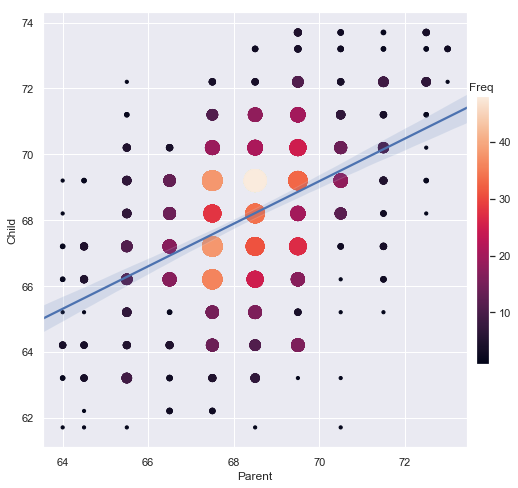

In [19]:
counts = Counter([(a, b) for a, b in zip(x, y)])
size = [counts[(a, b)] for a, b in zip(x, y)]
y_std = y.std()
fig = plt.figure(figsize=(8,8))
sns.set(font_scale=1)
ax = plt.scatter(
    x=x, 
    y=y,
    s=[s * 10 for s in size],
    c=size
)
sns.regplot(x=x, y=y, scatter=False)
plt.xlabel('Parent')
plt.ylabel('Child')
bar = fig.colorbar(ax,ticks=[10, 20, 30, 40],fraction=0.03, pad=0.02)
bar.set_label('Freq',labelpad=-30, y=1.05, rotation=0)